In [18]:
%matplotlib inline
import pandas as pd

import os
from tqdm import tqdm
#tmpFDir='/tmp/tmp.tsv'
import numpy as np



In [19]:
sra_dump_pickle_dir='/cellar/users/btsui/Data/SRA/DUMP/sra_dump.pickle'

sra_dump_pickle_dir_annotated_dir=sra_dump_pickle_dir.replace('.pickle','.fastqc.bowtie_algn.pickle')


sra_dump_df=pd.read_pickle(sra_dump_pickle_dir_annotated_dir)

In [20]:
#sra_dump_df.head().T

### number of runs processed

In [21]:
sra_dump_df[('bowtie2','n reads detected')]=sra_dump_df['bowtie2'][
    ['(\d+) mates make up the pairs','(\d+) reads; of these:']].astype(float).max(axis=1)

In [65]:
sra_dump_df['SRAmeta']['Bases'].median()/10**6

296.2890195

In [22]:
bowtie2Df=sra_dump_df['bowtie2'].copy()

In [23]:
bowtie2Df['LibraryStrategy']=sra_dump_df['SRAmeta']['LibraryStrategy']
bowtie2Df['LibraryLayout']=sra_dump_df['SRAmeta']['LibraryLayout'].values


In [24]:
bowtie2Df['LibraryLayout'].value_counts()/bowtie2Df['LibraryLayout'].value_counts().sum()

PAIRED    0.64801
SINGLE    0.35199
Name: LibraryLayout, dtype: float64

In [25]:
#convert the following columns to float
myGL=['(\d+) \([0-9.]*%\) aligned >1 times',
       '(\d+) \([0-9.]*%\) aligned exactly 1 time',
       '(\d+) mates make up the pairs', '(\d+) reads; of these:',
       'n reads detected']

In [26]:
for myG in myGL:
    bowtie2Df[myG]=bowtie2Df[myG].astype(float)

In [27]:
bowtie2Df['percent_uniquely_aligned']=(bowtie2Df['(\d+) \([0-9.]*%\) aligned exactly 1 time']/bowtie2Df['n reads detected']
)

In [28]:
bowtie2Df['percent_multi_aligned']=(bowtie2Df['(\d+) \([0-9.]*%\) aligned >1 times']/bowtie2Df['n reads detected']
)

In [29]:
groupby_L=['LibraryStrategy','LibraryLayout']


In [30]:
bowtie2Df.head()

(\d+) \([0-9.]*%\) aligned >1 times  \
SRR1767434                                  0.0   
SRR5009468                                  0.0   
SRR033781                                 572.0   
SRR018411                                   NaN   
SRR1371483                                  NaN   

            (\d+) \([0-9.]*%\) aligned exactly 1 time  \
SRR1767434                                      918.0   
SRR5009468                                       64.0   
SRR033781                                     35441.0   
SRR018411                                         NaN   
SRR1371483                                        NaN   

            (\d+) mates make up the pairs  (\d+) reads; of these:  \
SRR1767434                            NaN                420572.0   
SRR5009468                            NaN                   583.0   
SRR033781                             NaN               1149373.0   
SRR018411                             NaN                     NaN   
SRR1371483                            NaN                     NaN   

            n reads detected LibraryStrategy LibraryLayout  \
SRR1767434          420572.0        AMPLICON        SINGLE   
SRR5009468             583.0         RNA-Seq        SINGLE   
SRR033781          1149373.0             WGS        SINGLE   
SRR018411                NaN             WXS        SINGLE   
SRR1371483               NaN        AMPLICON        SINGLE   

            percent_uniquely_aligned  percent_multi_aligned  
SRR1767434                  0.002183               0.000000  
SRR5009468                  0.109777               0.000000  
SRR033781                   0.030835               0.000498  
SRR018411                        NaN                    NaN  
SRR1371483                       NaN                    NaN

In [31]:
print ('sample size count')
bowtie2Df[bowtie2Df['n reads detected'].notnull()].groupby(groupby_L).size().to_frame().T

sample size count


LibraryStrategy AMPLICON        ChIP-Seq        RNA-Seq           WGS         \
LibraryLayout     PAIRED SINGLE   PAIRED SINGLE  PAIRED SINGLE PAIRED SINGLE   
0                   9472   2011     6291  29410   73428  48106  72915   7593   

LibraryStrategy    WXS         
LibraryLayout   PAIRED SINGLE  
0                26949   1497

In [32]:

tmpDf=bowtie2Df.groupby(groupby_L).median().T

In [33]:
includeLibraryL='AMPLICON','ChIP-Seq','RNA-Seq','WGS','WXS'
m_2=tmpDf.columns.get_level_values('LibraryStrategy').isin(
includeLibraryL)
tmpDf.loc[:,m_2]

LibraryStrategy                                AMPLICON                \
LibraryLayout                                    PAIRED        SINGLE   
(\d+) \([0-9.]*%\) aligned >1 times        4.764000e+03  3.419600e+04   
(\d+) \([0-9.]*%\) aligned exactly 1 time  3.227400e+04  1.999320e+05   
(\d+) mates make up the pairs              1.704074e+06           NaN   
(\d+) reads; of these:                              NaN  4.024483e+06   
n reads detected                           1.704074e+06  4.024483e+06   
percent_uniquely_aligned                   2.746590e-02  4.478626e-02   
percent_multi_aligned                      1.900389e-03  7.492049e-03   

LibraryStrategy                                ChIP-Seq                \
LibraryLayout                                    PAIRED        SINGLE   
(\d+) \([0-9.]*%\) aligned >1 times        2.543300e+04  1.046650e+05   
(\d+) \([0-9.]*%\) aligned exactly 1 time  8.216710e+05  1.690868e+06   
(\d+) mates make up the pairs              4.897070e+07           NaN   
(\d+) reads; of these:                              NaN  2.214723e+07   
n reads detected                           4.897070e+07  2.214723e+07   
percent_uniquely_aligned                   1.849488e-02  7.646775e-02   
percent_multi_aligned                      7.422455e-04  4.636881e-03   

LibraryStrategy                                 RNA-Seq                \
LibraryLayout                                    PAIRED        SINGLE   
(\d+) \([0-9.]*%\) aligned >1 times        1.606805e+05  6.954460e+05   
(\d+) \([0-9.]*%\) aligned exactly 1 time  1.189300e+06  2.765874e+06   
(\d+) mates make up the pairs              1.920547e+07           NaN   
(\d+) reads; of these:                     1.000000e+00  1.200173e+07   
n reads detected                           1.920446e+07  1.200173e+07   
percent_uniquely_aligned                   7.088738e-02  2.882030e-01   
percent_multi_aligned                      8.721957e-03  6.048607e-02   

LibraryStrategy                                     WGS                \
LibraryLayout                                    PAIRED        SINGLE   
(\d+) \([0-9.]*%\) aligned >1 times        2.739000e+03  1.425600e+04   
(\d+) \([0-9.]*%\) aligned exactly 1 time  6.377900e+04  3.832330e+05   
(\d+) mates make up the pairs              5.677258e+06           NaN   
(\d+) reads; of these:                              NaN  6.544737e+06   
n reads detected                           5.677258e+06  6.544737e+06   
percent_uniquely_aligned                   1.766939e-02  6.386286e-02   
percent_multi_aligned                      4.763846e-04  2.236931e-03   

LibraryStrategy                                     WXS                
LibraryLayout                                    PAIRED        SINGLE  
(\d+) \([0-9.]*%\) aligned >1 times        1.420400e+04  1.135200e+04  
(\d+) \([0-9.]*%\) aligned exactly 1 time  1.348910e+05  1.223420e+05  
(\d+) mates make up the pairs              3.849950e+06           NaN  
(\d+) reads; of these:                              NaN  5.598512e+07  
n reads detected                           3.849950e+06  5.598512e+07  
percent_uniquely_aligned                   3.906408e-02  2.182173e-03  
percent_multi_aligned                      3.998311e-03  2.144878e-04

In [34]:
#'proj_accession_Visibility', 'Status'
#sra_dump_df[('SRAmeta','proj_accession_Visibility')]

In [35]:
#sra_dump_df.head().T

In [36]:
fastqc_df=sra_dump_df['fastqc']

In [37]:
fastqc_df['LibraryStrategy']=sra_dump_df['SRAmeta']['LibraryStrategy'].values
fastqc_df['LibraryLayout']=sra_dump_df['SRAmeta']['LibraryLayout'].values


/cellar/users/btsui/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/cellar/users/btsui/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [38]:
#fastqc_df.head()

In [39]:
myGL=['Reads with adapters:\s+([0-9,]+)',
       'Total basepairs processed:\s+([0-9,]+)',
       'Total reads processed:\s+([0-9,]+)',
       'Total written \(filtered\):\s+([0-9,]+)']
fastq_df=fastqc_df.dropna()
for myG in myGL:
    fastq_df[myG]=fastq_df[myG].str.replace(',','').astype(float)
    

/cellar/users/btsui/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [40]:
fastq_df['read_length']=fastq_df['Total basepairs processed:\s+([0-9,]+)']/fastq_df['Total reads processed:\s+([0-9,]+)']

/cellar/users/btsui/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [61]:
#fastq_df['Total basepairs processed:\s+([0-9,]+)']

In [55]:
#fastq_df['read_length'].median()

In [56]:
tmpS=1-(fastq_df['Total written \(filtered\):\s+([0-9,]+)']/fastq_df['Total basepairs processed:\s+([0-9,]+)'])

In [59]:
#tmpS[(tmpS>0)].median()

In [185]:
groupby_L=['LibraryStrategy','LibraryLayout']
fastq_df.groupby(groupby_L).median().dropna().T


LibraryStrategy                          AMPLICON            ChIP-Seq  \
LibraryLayout                              PAIRED    SINGLE    PAIRED   
Reads with adapters:\s+([0-9,]+)            631.0     579.0     721.0   
Total basepairs processed:\s+([0-9,]+)   500000.0  360000.0  200000.0   
Total reads processed:\s+([0-9,]+)         2000.0    2500.0    2000.0   
Total written \(filtered\):\s+([0-9,]+)  488074.0  311307.0  195823.0   
read_length                                 250.0     144.0     100.0   

LibraryStrategy                                     RNA-Seq            \
LibraryLayout                              SINGLE    PAIRED    SINGLE   
Reads with adapters:\s+([0-9,]+)            877.0     686.0     826.0   
Total basepairs processed:\s+([0-9,]+)   125000.0  180000.0  127500.0   
Total reads processed:\s+([0-9,]+)         2500.0    2000.0    2500.0   
Total written \(filtered\):\s+([0-9,]+)  118293.0  159713.0  125811.0   
read_length                                  50.0      90.0      51.0   

LibraryStrategy                               WGS                   WXS  \
LibraryLayout                              PAIRED      SINGLE    PAIRED   
Reads with adapters:\s+([0-9,]+)            632.0     864.000     674.0   
Total basepairs processed:\s+([0-9,]+)   202000.0  242841.000  200000.0   
Total reads processed:\s+([0-9,]+)         2000.0    2500.000    2000.0   
Total written \(filtered\):\s+([0-9,]+)  197283.0  185169.000  195717.0   
read_length                                 101.0      97.325     100.0   

LibraryStrategy                                      
LibraryLayout                                SINGLE  
Reads with adapters:\s+([0-9,]+)            800.000  
Total basepairs processed:\s+([0-9,]+)   449190.000  
Total reads processed:\s+([0-9,]+)         2500.000  
Total written \(filtered\):\s+([0-9,]+)  428996.000  
read_length                                 179.676

In [186]:
g=fastqc_df.groupby(groupby_L)['Adapter sequence:(.*)']

adaptorVC=g.value_counts()

In [187]:
adaptorVC.unstack().T

LibraryStrategy                                    AMPLICON        ChIP-Seq  \
LibraryLayout                                        PAIRED SINGLE   PAIRED   
Adapter sequence:(.*)                                                         
 'AGATCGGAAGAGC' (Illumina TruSeq, Sanger iPCR;...     1065    904     1819   
 'AGATCGGAAGAGC' (Illumina TruSeq, Sanger iPCR;...     1744   1403      927   
 'ATGGAATTCTCG' (Illumina small RNA adapter; au...       34     73        1   
 'CTGTCTCTTATA' (Nextera Transposase sequence; ...      370    213       28   

LibraryStrategy                                           RNA-Seq         \
LibraryLayout                                      SINGLE  PAIRED SINGLE   
Adapter sequence:(.*)                                                      
 'AGATCGGAAGAGC' (Illumina TruSeq, Sanger iPCR;...  12901   14993  20620   
 'AGATCGGAAGAGC' (Illumina TruSeq, Sanger iPCR;...  19581   11630  21422   
 'ATGGAATTCTCG' (Illumina small RNA adapter; au...     56      57   1436   
 'CTGTCTCTTATA' (Nextera Transposase sequence; ...    229    3105  12053   

LibraryStrategy                                       WGS           WXS         
LibraryLayout                                      PAIRED SINGLE PAIRED SINGLE  
Adapter sequence:(.*)                                                           
 'AGATCGGAAGAGC' (Illumina TruSeq, Sanger iPCR;...  16216   4379   3257   1136  
 'AGATCGGAAGAGC' (Illumina TruSeq, Sanger iPCR;...  16028   8598   4245   2724  
 'ATGGAATTCTCG' (Illumina small RNA adapter; au...     54    519      5    201  
 'CTGTCTCTTATA' (Nextera Transposase sequence; ...  21165   3414    127     64

In [ ]:
asdasdasd

# scratch

In [87]:
sra_dump_df[('fastqc','Adapter sequence:(.*)')]

In [84]:
g[['bowtie2','n reads detected']].astype(float).median(axis=0)

KeyError: "Columns not found: 'n reads detected', 'bowtie2'"

In [7]:
#median_reads_count=sra_dump_df[('bowtie2','n reads detected')].median()
#print ('Median read counts',median_reads_count)

In [8]:
#sra_dump_df[('fastqc','Total basepairs processed:\s+([0-9,]+)')].notnull().sum()

In [10]:
sra_dump_df_bowtie=sra_dump_df[('bowtie2')].astype(float)#.mean(axis=0)

In [24]:
sra_dump_df_bowtie.columns

Index(['(\d+) \([0-9.]*%\) aligned >1 times',
       '(\d+) \([0-9.]*%\) aligned exactly 1 time',
       '(\d+) mates make up the pairs', '(\d+) reads; of these:',
       'n reads detected'],
      dtype='object')

In [22]:
(sra_dump_df_bowtie['(\d+) \([0-9.]*%\) aligned exactly 1 time']/sra_dump_df_bowtie['n reads detected']
).astype(float).median()


0.05143088827353735

In [29]:
#sra_dump_df_bowtie['(\d+) \([0-9.]*%\) aligned >1 times'].median()
(sra_dump_df_bowtie['(\d+) \([0-9.]*%\) aligned >1 times']/sra_dump_df_bowtie['n reads detected']
).astype(float).median()

0.004645033219292296

In [31]:
sra_dump_df_bowtie.mean(axis=0).to_frame()

0
(\d+) \([0-9.]*%\) aligned >1 times        3.999482e+05
(\d+) \([0-9.]*%\) aligned exactly 1 time  1.993060e+06
(\d+) mates make up the pairs              2.581057e+07
(\d+) reads; of these:                     2.070566e+07
n reads detected                           2.418361e+07

In [30]:
sra_dump_df_bowtie.median(axis=0).to_frame()

0
(\d+) \([0-9.]*%\) aligned >1 times           55288.0
(\d+) \([0-9.]*%\) aligned exactly 1 time    566274.0
(\d+) mates make up the pairs               7296919.0
(\d+) reads; of these:                     15267599.0
n reads detected                           10065036.0

In [16]:
sra_dump_df_bowtie.mean(axis=0).to_frame()

0
(\d+) \([0-9.]*%\) aligned >1 times        3.999482e+05
(\d+) \([0-9.]*%\) aligned exactly 1 time  1.993060e+06
(\d+) mates make up the pairs              2.581057e+07
(\d+) reads; of these:                     2.070566e+07
n reads detected                           2.418361e+07

In [102]:
sra_dump_df[('bowtie2','n reads detected')].notnull().sum()

278235

# fastqc

### adaptor counts

In [30]:
tmpDf=sra_dump_df['fastqc']


tmpDf.loc[:,'Adapter sequence:(.*)'].value_counts().to_frame()

Adapter sequence:(.*)
 'AGATCGGAAGAGC' (Illumina TruSeq, Sanger iPCR;...                  88548
 'AGATCGGAAGAGC' (Illumina TruSeq, Sanger iPCR;...                  77331
 'CTGTCTCTTATA' (Nextera Transposase sequence; ...                  41036
 'ATGGAATTCTCG' (Illumina small RNA adapter; au...                   2485

In [41]:
m=tmpDf.columns.isin(['Adapter sequence:(.*)'])
subDf=tmpDf.loc[:,~m]#.mean(axis=0)


In [46]:
numericDf=subDf.apply(lambda tmpS:tmpS.str.replace(',','')).astype(float)

mean read length

In [69]:
readLengthS=(numericDf['Total basepairs processed:\s+([0-9,]+)']/numericDf['Total reads processed:\s+([0-9,]+)'])

In [90]:
readLengthS.median()

96.25355

In [72]:
#numericDf

In [4]:
sra_dump_pickle_dir='/cellar/users/btsui/Data/SRA/DUMP/sra_dump.pickle'


sra_dump_df=pd.read_pickle(sra_dump_pickle_dir)

In [11]:
tmpDf=pd.read_csv(tmpFDir,sep='\t',header=None).dropna()


In [4]:
!grep -rn  tmp.tsv ./*.ipynb

./analyzeAnlignmentStatistics.ipynb:14:    "tmpFDir='/tmp/tmp.tsv'\n",
./merge_aligning_statistics.ipynb:45:    "tmpFDir='/tmp/tmp.tsv'\n",
./merge_aligning_statistics.ipynb:86:    "#!cat /tmp/tmp.tsv"


In [23]:

tmpDf.columns=['inFname','regex','n']

unstackDf=tmpDf.set_index(['inFname','regex'])['n'].unstack()

#unstackDf['(\d+) mates make up the pairs'].dropna().hist()

unstackDf['aligned_reads']=unstackDf[['(\\d+) \\([0-9.]*%\\) aligned exactly 1 time',
                                      '(\\d+) \\([0-9.]*%\\) aligned >1 times']].sum(axis=1)

unstackDf['total_reads']=unstackDf[['(\d+) reads; of these:','(\\d+) mates make up the pairs']].sum(axis=1)

unstackDf.index=unstackDf.index.str.split('.').str[0]

## exome 

Text(0.5,0,'log10 number of reads aligned to target reference')

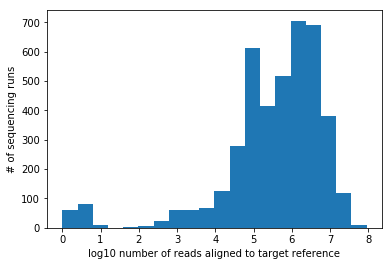

In [41]:
unstackDf['aligned_reads_log10']=np.log10(unstackDf['aligned_reads']+1)#/unstackDf['total_reads']
unstackDf['total_reads_log10']=np.log10(unstackDf['total_reads']+1)

ax=unstackDf['aligned_reads_log10'].hist(bins=20)
ax.grid(False)
ax.set_ylabel('# of sequencing runs')
ax.set_xlabel('log10 number of reads aligned to target reference')




In [53]:
import matplotlib.pyplot as plt

In [86]:
#!pip install colour
from colour import Color
#red = Color("rainbow")
colors = list(red.range_to(Color("green"),10))


/cellar/users/btsui/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  


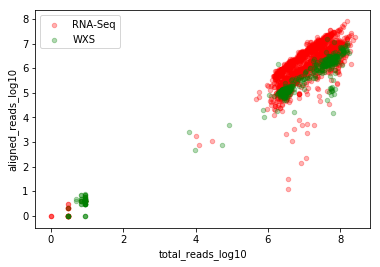

In [91]:
fig,ax=plt.subplots()

inFactors=['RNA-Seq', 'WXS']
#list(red.range_to(,len(inFactors)))
colors=['red','green','blue','purple','yellow']
for color, strategy in zip( colors,inFactors):
    subDf2=sra_dump_df[sra_dump_df['LibraryStrategy']==strategy]
    tmpDf3=unstackDf.loc[subDf2.index]
    tmpDf3.plot.scatter(x='total_reads_log10',y='aligned_reads_log10',ax=ax,c=color,alpha=0.3,label=strategy)
ax.legend()

In [82]:
len(colors)

10

/cellar/users/btsui/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/cellar/users/btsui/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


10044529.0

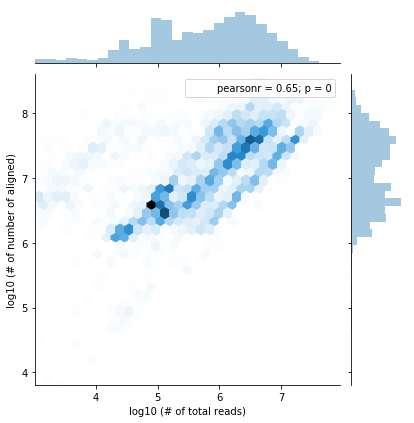

In [95]:
h=sns.jointplot(data=unstackDf[unstackDf.aligned_reads_log10>3],x='aligned_reads_log10',
              y='total_reads_log10',
              kind='hex')
h.ax_joint.set_xlabel('log10 (# of total reads)')
h.ax_joint.set_ylabel('log10 (# of number of aligned)')
10**unstackDf['total_reads_log10'].median()

Text(0.5,0,'Library strategies')

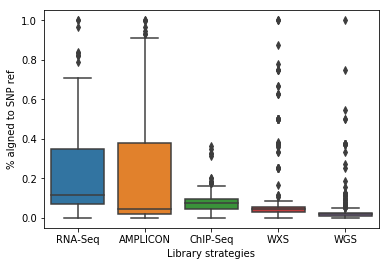

In [16]:

sra_dump_df['% algned to SNP ref']=percentageAlgnS.loc[:]

import seaborn as sns

ax=sns.boxplot(data=sra_dump_df,x='LibraryStrategy',order=['RNA-Seq', 'AMPLICON','ChIP-Seq','WXS','WGS'],
            y='% algned to SNP ref')
ax.set_xlabel('Library strategies')

In [97]:
percentageAlgnS.median()

5.835286521426918

In [39]:
m_2=sra_dump_df['SRAmeta']['LibraryStrategy']=='WGS'
m_processed=sra_dump_df[('bowtie2','n reads detected')].notnull()

In [42]:
sra_dump_df_subDf=sra_dump_df['SRAmeta'][m_2&m_processed]

In [51]:
len(sra_dump_df_subDf[(sra_dump_df_subDf.Study=='SRP002163')&(sra_dump_df_subDf.ScientificName=='Homo sapiens')]['Sample'].unique())
#113

0

In [52]:
#ERP013950: bullshit most likely
#SRP001518: 1000 Genomes Project, 113 samples
#SRP002163: 763, Human Microbiome Project (HMP)
#SRP116167: Noninvasive Prenatal Screen, 3405, 3405, 2017
#SRP000540: Whole genome sequencing of (TSI) Toscani in Italia HapMap population

sra_dump_df_subDf.Study.value_counts()

ERP013950    13036
SRP001518     4270
SRP002163     4080
SRP116167     3404
SRP000540     3155
SRP002480     2777
SRP004077     2355
SRP040146     2028
SRP000547     1586
SRP016105     1510
SRP016100     1468
SRP000806     1461
SRP015238     1379
SRP115494     1322
SRP000544     1277
SRP001293     1190
SRP096283     1140
SRP000543     1066
SRP015236     1024
SRP100518      880
SRP091570      880
SRP001522      799
SRP090628      785
SRP001516      763
SRP001524      729
SRP032345      639
SRP062566      622
SRP001294      570
SRP000542      566
SRP000546      562
             ...  
SRP086868        1
SRP095412        1
SRP055701        1
SRP015260        1
SRP033329        1
SRP043994        1
SRP033227        1
SRP067962        1
SRP043366        1
SRP062294        1
SRP017751        1
SRP125668        1
SRP080098        1
SRP034852        1
SRP017509        1
SRP029640        1
SRP044150        1
SRP009066        1
SRP008319        1
SRP061110        1
SRP018736        1
SRP003201   